In [58]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import re

file_path = '/content/drive/My Drive/FDA/'

# Read the dataset
reac_df = pd.read_csv(file_path+"REAC24Q4.txt", sep='$')
demo_df = pd.read_csv(file_path+"DEMO24Q4.txt", sep='$')
drug_df = pd.read_csv(file_path+"DRUG24Q4.txt", sep='$')
indi_df = pd.read_csv(file_path+"INDI24Q4.txt", sep='$')
outc_df = pd.read_csv(file_path+"OUTC24Q4.txt", sep='$')
rpsr_df = pd.read_csv(file_path+"RPSR24Q4.txt", sep='$')
ther_df = pd.read_csv(file_path+"THER24Q4.txt", sep='$')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-58-2d2311b22119>:11: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_df = pd.read_csv(file_path+"DEMO24Q4.txt", sep='$')
<ipython-input-58-2d2311b22119>:12: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_df = pd.read_csv(file_path+"DRUG24Q4.txt", sep='$')


In [59]:
reac_df

,primaryid,caseid,pt,drug_rec_act
0,100100247,10010024,Malignant melanoma stage I,NaN
1,100100247,10010024,Keratoacanthoma,NaN
2,100100247,10010024,Blood pressure increased,NaN
3,100100247,10010024,Keratoacanthoma,NaN
4,100100247,10010024,Hyperkeratosis,NaN
...,...,...,...,...
1472745,99310703,9931070,Liver transplant rejection,NaN
1472746,99310703,9931070,Post transplant lymphoproliferative disorder,NaN
1472747,99310743,9931074,Post transplant lymphoproliferative disorder,NaN
1472748,99696784,9969678,Drug reaction with eosinophilia and systemic s...,NaN


In [60]:
demo_df

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country
0,100100247,10010024,7,F,20080501.0,20241104,20140313,20241109,EXP,NaN,...,NaN,M,Y,NaN,NaN,20241109,NaN,MD,DE,DE
1,100373859,10037385,9,F,20120101.0,20241030,20140326,20241111,EXP,NaN,...,E,F,Y,64.3,KG,20241111,NaN,MD,GB,GB
2,1016611044,10166110,44,F,20140430.0,20241129,20140512,20241204,EXP,NaN,...,A,F,Y,NaN,NaN,20241204,NaN,MD,CA,CA
3,101735213,10173521,3,F,20140507.0,20241121,20140515,20241217,EXP,NaN,...,T,M,Y,68.0,KG,20241217,NaN,MD,GB,GB
4,1020101730,10201017,30,F,20140428.0,20241112,20140528,20241114,EXP,NaN,...,NaN,M,Y,NaN,NaN,20241114,NaN,HP,CA,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410844,99198746,9919874,6,F,NaN,20231018,20140224,20241018,EXP,NaN,...,NaN,M,Y,NaN,NaN,20241018,NaN,MD,CA,CA
410845,99310683,9931068,3,F,NaN,20241007,20140227,20241009,EXP,NaN,...,NaN,F,Y,NaN,NaN,20241009,NaN,HP,FR,FR
410846,99310703,9931070,3,F,NaN,20241008,20140227,20241011,EXP,NaN,...,NaN,F,Y,NaN,NaN,20241011,NaN,HP,FR,FR
410847,99310743,9931074,3,F,NaN,20241007,20140227,20241010,EXP,NaN,...,NaN,F,Y,NaN,NaN,20241010,NaN,HP,FR,FR


In [61]:
drug_df

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,100100247,10010024,1,PS,ADALIMUMAB,ADALIMUMAB,1,Subcutaneous,NaN,NaN,NaN,Y,NaN,Not Available,NaN,125057.0,40.0,MG,NaN,QOW
1,100100247,10010024,2,SS,ADALIMUMAB,ADALIMUMAB,1,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,125057.0,NaN,NaN,NaN,NaN
2,100100247,10010024,3,SS,CYCLOSPORINE,CYCLOSPORINE,1,Unknown,NaN,NaN,NaN,D,NaN,Not Available,NaN,65003.0,NaN,NaN,NaN,NaN
3,100100247,10010024,4,SS,REMICADE,INFLIXIMAB,1,Intravenous (not otherwise specified),6 infusions at 8 weeks interval,NaN,NaN,Y,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
4,100100247,10010024,5,SS,ETANERCEPT,ETANERCEPT,1,Subcutaneous,NaN,NaN,NaN,Y,NaN,Not Available,NaN,NaN,100.0,MG,NaN,/WK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030933,99696784,9969678,12,SS,DAPTOMYCIN,DAPTOMYCIN,1,Unknown,"500 mg, Daily",NaN,NaN,Y,NaN,NaN,NaN,NaN,500.0,MG,NaN,NaN
2030934,99696784,9969678,13,SS,PANTOPRAZOLE SODIUM I.V.,PANTOPRAZOLE SODIUM,1,Unknown,"40 mg, UNK",NaN,NaN,U,U,unk,NaN,NaN,40.0,MG,Injection,NaN
2030935,99696784,9969678,14,C,ACETAMINOPHEN\CODEINE PHOSPHATE,ACETAMINOPHEN\CODEINE PHOSPHATE,1,Unknown,"500/30 mg, daily",NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030936,99696784,9969678,15,C,METHYLPREDNISOLONE,METHYLPREDNISOLONE,1,Unknown,"80 mg, bid",NaN,NaN,Y,NaN,NaN,NaN,NaN,80.0,MG,NaN,Q12H


In [62]:
indi_df

,primaryid,caseid,indi_drug_seq,indi_pt
0,100100247,10010024,1,Psoriasis
1,100100247,10010024,2,Psoriasis
2,100100247,10010024,3,Psoriasis
3,100100247,10010024,4,Psoriasis
4,100100247,10010024,5,Psoriasis
...,...,...,...,...
1219754,99696784,9969678,12,Product used for unknown indication
1219755,99696784,9969678,13,Product used for unknown indication
1219756,99696784,9969678,14,Product used for unknown indication
1219757,99696784,9969678,15,Product used for unknown indication


In [63]:
outc_df

,primaryid,caseid,outc_cod
0,100100247,10010024,OT
1,100373859,10037385,DS
2,100373859,10037385,OT
3,1016611044,10166110,HO
4,1016611044,10166110,OT
...,...,...,...
308955,99310683,9931068,OT
308956,99310703,9931070,DE
308957,99310703,9931070,OT
308958,99310743,9931074,DE


In [64]:
rpsr_df

,primaryid,caseid,rpsr_cod
0,243835561,24383556,HP
1,243836211,24383621,HP
2,243836221,24383622,HP
3,243837501,24383750,HP
4,243837511,24383751,HP
...,...,...,...
11622,247999961,24799996,CSM
11623,248000321,24800032,CSM
11624,248053191,24805319,CSM
11625,248305721,24830572,HP


In [65]:
ther_df

,primaryid,caseid,dsg_drug_seq,start_dt,end_dt,dur,dur_cod
0,100100247,10010024,1,2007.0,NaN,6.0,YR
1,100100247,10010024,3,NaN,NaN,2.0,MON
2,100100247,10010024,4,NaN,NaN,5.0,WK
3,100100247,10010024,5,200706.0,NaN,NaN,NaN
4,100100247,10010024,6,NaN,NaN,5.0,WK
...,...,...,...,...,...,...,...
561884,990796022,9907960,10,20181227.0,NaN,NaN,NaN
561885,990796022,9907960,11,20190730.0,NaN,NaN,NaN
561886,990796022,9907960,12,20220907.0,NaN,NaN,NaN
561887,990796022,9907960,13,20221018.0,NaN,NaN,NaN


In [66]:
# Check for unique drug names
unique_drug_names = drug_df['drugname'].nunique()
print(f"There are {unique_drug_names} unique drug names in the drug_df DataFrame.")

There are 27175 unique drug names in the drug_df DataFrame.


In [67]:
# Filter drug_df for rows where 'drugname' contains 'prednisolone'
prednisolone_drugs = drug_df[drug_df['drugname'].str.contains('prednisolone', na=False, case=False)]

# Display the filtered DataFrame
prednisolone_drugs

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
64,102112834,10211283,3,SS,METHYLPREDNISOLONE,METHYLPREDNISOLONE,1,Unknown,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,103853219,10385321,6,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,Time Interval: 0.33333333 days: Dosage Text: 2...,980.0,MG,D,NaN,Unknown,NaN,NaN,20.0,MG,UNK,NaN
153,103853219,10385321,7,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,"60 milligram, qd",980.0,MG,D,NaN,Unknown,NaN,NaN,60.0,MG,Unknown,QD
155,103853219,10385321,9,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,"60 milligram, qd",NaN,NaN,D,NaN,Unknown,NaN,80354.0,60.0,MG,Unknown,QD
312,104651104,10465110,8,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,20mg 3 times a day for days1-14,NaN,NaN,U,U,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030804,98394552,9839455,2,SS,METHYLPREDNISOLONE,METHYLPREDNISOLONE,1,Unknown,NaN,NaN,NaN,Y,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2030811,98444074,9844407,5,SS,PREDNISOLONE,PREDNISOLONE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030812,98444074,9844407,6,SS,PREDNISOLONE,PREDNISOLONE,1,NaN,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030936,99696784,9969678,15,C,METHYLPREDNISOLONE,METHYLPREDNISOLONE,1,Unknown,"80 mg, bid",NaN,NaN,Y,NaN,NaN,NaN,NaN,80.0,MG,NaN,Q12H


In [68]:
# Count the number of unique drug names in the filtered DataFrame
unique_prednisolone_drugs = prednisolone_drugs['drugname'].nunique()
print(f"There are {unique_prednisolone_drugs} unique drug names containing 'prednisolone'.")

# Display the unique drug names
print("\nUnique drug names containing 'prednisolone':")
print(prednisolone_drugs['drugname'].unique())


There are 66 unique drug names containing 'prednisolone'.

Unique drug names containing 'prednisolone':
['METHYLPREDNISOLONE' 'PREDNISOLONE' 'METHYLPREDNISOLONE SODIUM SUCCINATE'
 'OXYMETAZOLINE HYDROCHLORIDE;PREDNISOLONE SODIUM PHOSPHATE'
 'OXYMETAZOLINE HYDROCHLORIDE\\PREDNISOLONE SODIUM PHOSPHATE'
 'METHYLPREDNISOLONE ACEPONATE'
 'SOLOMET [METHYLPREDNISOLONE SODIUM SUCCINATE]'
 'METHYLPREDNISOLONE ACETATE' 'METHYLPREDNISOLONE SODIUM PHOSPHATE'
 'MOXIFLOXACIN\\PREDNISOLONE ACETATE' 'PREDNISOLONE SODIUM PHOSPHATE'
 'PREDNISOLONE ACETATE'
 'CISPLATIN\\CYTARABINE\\ETOPOSIDE\\METHYLPREDNISOLONE (ESHAP)'
 'BROMFENAC;PREDNISOLONE' 'Nepafenac;Prednisolone'
 'PREDNISOLONE STEAGLATE' 'Bromfenac;Moxifloxacin;Prednisolone'
 '.ALPHA.-TOCOPHEROL ACETATE\\ALLANTOIN\\LIDOCAINE\\PREDNISOLONE'
 'PREDNISOLUT [PREDNISOLONE HEMISUCCINATE]'
 'METHYLPREDNISOLONE;OBINUTUZUMAB' 'LIDOCAINE\\METHYLPREDNISOLONE ACETATE'
 'PREDSIM [PREDNISOLONE]' 'PREDNISOLONE VALERATE ACETATE'
 'PREDNISOLONE VALEROACETATE' 'br

In [69]:
# Keep the rows where drugname == 'prednisolone' in drug_df
drug_df['drugname_clean'] = drug_df['drugname'].str.lower().str.strip()
prednisolone_df = drug_df[drug_df['drugname_clean'] == 'prednisolone'].copy()

In [70]:
prednisolone_df

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,...,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,drugname_clean
152,103853219,10385321,6,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,Time Interval: 0.33333333 days: Dosage Text: 2...,980.0,...,D,NaN,Unknown,NaN,NaN,20.0,MG,UNK,NaN,prednisolone
153,103853219,10385321,7,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,"60 milligram, qd",980.0,...,D,NaN,Unknown,NaN,NaN,60.0,MG,Unknown,QD,prednisolone
155,103853219,10385321,9,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,"60 milligram, qd",NaN,...,D,NaN,Unknown,NaN,80354.0,60.0,MG,Unknown,QD,prednisolone
312,104651104,10465110,8,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,20mg 3 times a day for days1-14,NaN,...,U,U,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,prednisolone
488,105622304,10562230,2,SS,PREDNISOLONE,PREDNISOLONE,1,Oral,20mg 3 times a day for days1-14,NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,MG,NaN,TID,prednisolone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030091,91071202,9107120,10,C,PREDNISOLONE,PREDNISOLONE,1,NaN,UNK,NaN,...,NaN,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,prednisolone
2030384,95342459,9534245,19,C,PREDNISOLONE,PREDNISOLONE,1,Transplacental,"25 mg, qd",NaN,...,U,NaN,NaN,NaN,NaN,25.0,MG,NaN,QD,prednisolone
2030738,980219332,9802193,18,C,PREDNISOLONE,PREDNISOLONE,1,Transplacental,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QD,prednisolone
2030811,98444074,9844407,5,SS,PREDNISOLONE,PREDNISOLONE,1,Unknown,UNK,NaN,...,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prednisolone


In [71]:
# Extract the caseid of all prednisolone rows
caseids = prednisolone_df['caseid'].unique()

# Filter other tables separately and keep only the rows whose caseid belongs to the above set
demo_sub = demo_df[ demo_df['caseid'].isin(caseids) ].copy()
reac_sub = reac_df[ reac_df['caseid'].isin(caseids) ].copy()
indi_sub = indi_df[ indi_df['caseid'].isin(caseids) ].copy()

# Select useful columns
demo_sub_small = demo_sub[['caseid','age','sex']].copy()
reac_sub_small = reac_sub[['caseid','pt']].copy()
indi_sub_small = indi_sub[['caseid','indi_pt']].copy()

# Merge the child tables (keep only the required columns) with "caseid" as the key
merged_demo_reac = pd.merge(demo_sub_small, reac_sub_small, on='caseid', how='left')
final_merged = pd.merge(merged_demo_reac, indi_sub_small, on='caseid', how='left')

# View the merge results
print("Number of rows after merging:", len(final_merged))
final_merged.head(10)

Number of rows after merging: 2194995


,caseid,age,sex,pt,indi_pt
0,10385321,34.0,F,Pyrexia,White blood cell count decreased
1,10385321,34.0,F,Pyrexia,Hodgkin's disease
2,10385321,34.0,F,Pyrexia,Product used for unknown indication
3,10385321,34.0,F,Pyrexia,Product used for unknown indication
4,10385321,34.0,F,Pyrexia,Prophylaxis of nausea and vomiting
5,10385321,34.0,F,Pyrexia,Hodgkin's disease
6,10385321,34.0,F,Pyrexia,Hodgkin's disease
7,10385321,34.0,F,Pyrexia,Hodgkin's disease
8,10385321,34.0,F,Pyrexia,Product used for unknown indication
9,10385321,34.0,F,Pyrexia,Hodgkin's disease


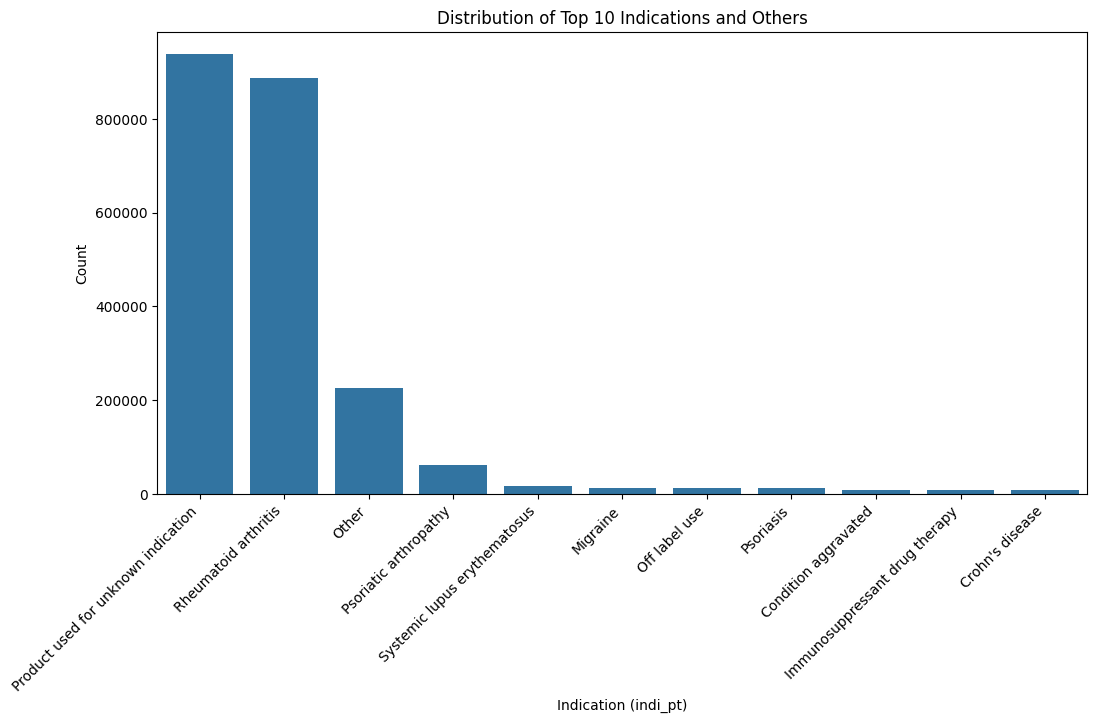

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each 'indi_pt' value
indi_pt_counts = final_merged['indi_pt'].value_counts()

# Get the top 10 most frequent 'indi_pt' values
top_10_indi_pt = indi_pt_counts.head(10)

# Create a new column 'indi_pt_grouped'
final_merged['indi_pt_grouped'] = final_merged['indi_pt'].apply(lambda x: x if x in top_10_indi_pt.index else 'Other')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='indi_pt_grouped', data=final_merged, order = final_merged['indi_pt_grouped'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Indication (indi_pt)')
plt.ylabel('Count')
plt.title('Distribution of Top 10 Indications and Others')
plt.show()

In [73]:
# Merge columns with the same caseid
def join_unique(x):
    return "; ".join(sorted(set(x.dropna())))

final_one_row = final_merged.groupby("caseid", as_index=False).agg({
    'age': 'first',
    'sex': 'first',
    'pt': join_unique,
    'indi_pt': join_unique
})

merged_df = final_one_row.head()

In [74]:
merged_df

,caseid,age,sex,pt,indi_pt
0,6084787,64.0,M,Blood creatinine increased; Dizziness; Hyperte...,Product used for unknown indication; Renal tra...
1,6254162,67.0,F,Death; Hepatic failure; Hyperammonaemia; Mycob...,Immunosuppressant drug therapy; Prophylaxis ag...
2,6353136,9.0,M,Blood lactate dehydrogenase increased; C-react...,Graft versus host disease; Product used for un...
3,6635598,30.0,F,Ascites; Colitis ulcerative; Hepatic cirrhosis...,Immunosuppression
4,6674528,62.0,M,Fungal infection; Mucormycosis; Multiple organ...,Immunosuppression; Liver transplant; Prophylaxis


In [75]:
# Display basic information about the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   caseid   5 non-null      int64  
 1   age      5 non-null      float64
 2   sex      5 non-null      object 
 3   pt       5 non-null      object 
 4   indi_pt  5 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes


In [76]:
# Check for missing values
print(merged_df.isnull().sum())

caseid     0
age        0
sex        0
pt         0
indi_pt    0
dtype: int64


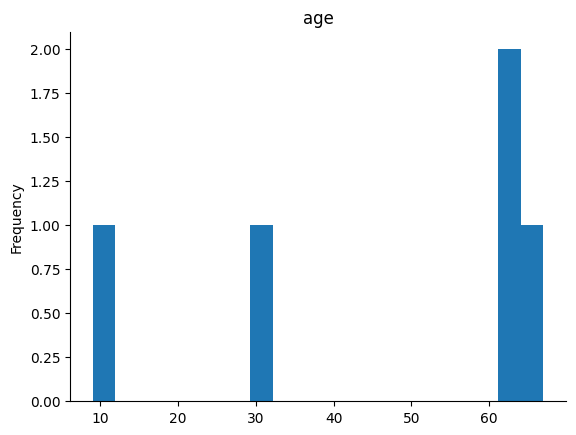

In [80]:
# Explore the distribution of 'age'
merged_df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

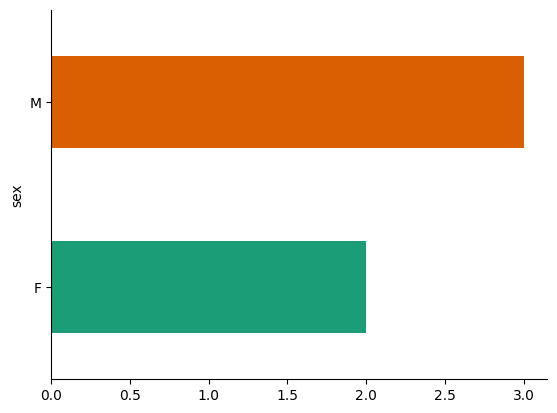

In [78]:
# Count by different genders
merged_df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

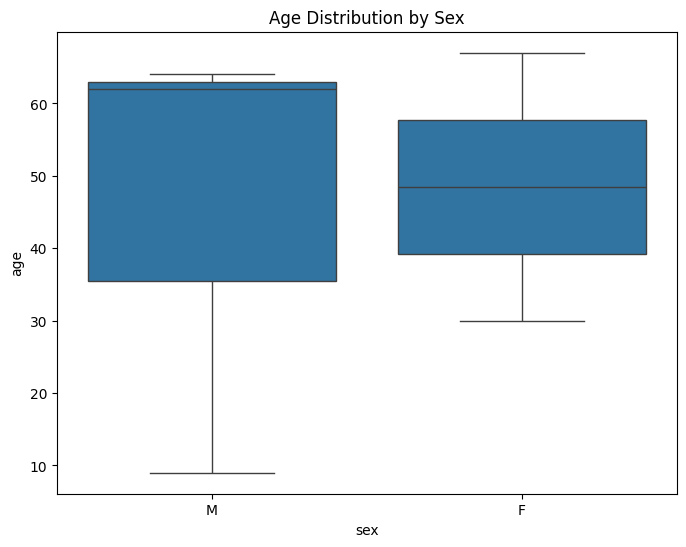

In [79]:
# Analyze the relationship between 'age' and 'sex'
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=merged_df)
plt.title('Age Distribution by Sex')
plt.show()